Plots to demo eccentricity measurement plots for different waveforms

In [1]:
import sys
sys.path.append("../../")
%load_ext autoreload
%autoreload 2

In [2]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict, lstyles, lwidths
import matplotlib.pyplot as plt
import numpy as np
from measureEccentricity.utils import get_peak_via_quadratic_fit
import matplotlib as mpl

/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


### Demo for SEOB

In [3]:
from EccTests.TestEOBvsMeasuredEcc.seobnrv4ehm import get_modes
import lal

In [4]:
M = 50
MT = M * lal.MTSUN_SI
q = 4
chi1 = -0.6
chi2=-0.6
eccentric_anomaly=np.pi/2
EccIC=-1
Momega0_zeroecc = 0.005
f_low_zeroecc = Momega0_zeroecc/np.pi/MT
tzeroecc, hlmzeroecc = get_modes(q=q, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=0, eccentric_anomaly=eccentric_anomaly, EccIC=EccIC, f_min=f_low_zeroecc, physical_units=False, save=False)
tzeroecc = tzeroecc - get_peak_via_quadratic_fit(tzeroecc, np.abs(hlmzeroecc[(2, 2)]))[0]
    
def getDataDict(Momega0, ecc):
    f_low = Momega0/np.pi/MT
    tecc, hlmecc = get_modes(q=4, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=ecc, eccentric_anomaly=eccentric_anomaly, EccIC=EccIC, f_min=f_low, physical_units=False, save=False)
    tecc = tecc - get_peak_via_quadratic_fit(tecc, np.abs(hlmecc[(2, 2)]))[0]
    startzero = np.argmin(np.abs(tzeroecc - tecc[0])) - 10
    dataDict = {"t": tecc, "hlm": hlmecc, "t_zeroecc": tzeroecc[startzero:], "hlm_zeroecc":{(2, 2): hlmzeroecc[(2, 2)][startzero: ]}}
    return dataDict

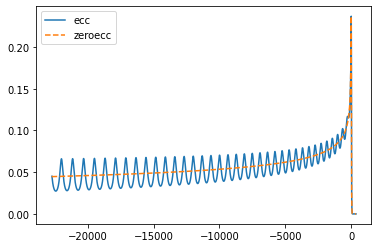

In [5]:
Momega0 = 0.01
ecc_in = 0.3
datadict = getDataDict(Momega0, ecc_in)
plt.plot(datadict["t"], np.abs(datadict["hlm"][(2, 2)]), label="ecc")
plt.plot(datadict["t_zeroecc"], np.abs(datadict["hlm_zeroecc"][(2, 2)]), label="zeroecc", ls="--")
plt.legend()

In [6]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

In [7]:
from tqdm import tqdm

### Test the `ResidualAmplitude` method from ecc=1e-7 to ecc=1 with `treat_mid_points_between_peaks_as_troughs=True` and `False`

Text(0, 0.5, 'Re[$h_{22}(t)$]')

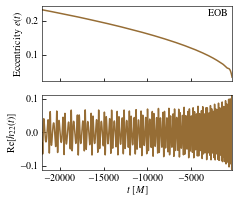

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 3), sharex=True)
tref_in = datadict["t"]
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                    dataDict=datadict,
                                                    method="ResidualAmplitude",
                                                    return_ecc_method=True,
                                                    # extra_kwargs={"treat_mid_points_between_peaks_as_troughs": False}
                                                    )
eccMethod.plot_measured_ecc(fig, ax[0])
ax[0].set_xlabel("")
ax[0].grid(False)
ax[0].text(0.98, 0.98, "EOB", ha="right", va="top", transform=ax[0].transAxes)


ax[1].plot(tref_in, np.real(datadict["hlm"][(2, 2)]), c=colorsDict["default"])
ax[1].set_ylim(-0.11, 0.11)
ax[1].set_xlim(tref[0], tref[-1])
ax[1].set_xlabel(r"$t$ [$M$]")
ax[1].set_ylabel(r"Re[$h_{22}(t)$]")

In [10]:
fig.suptitle(fr"$q={q:.1f}$, $\chi_{{1z}}={chi1:.1f}$, $\chi_{{2z}}={chi2:.1f}$")
fig.subplots_adjust(left=0.16, right=0.98, top=0.92, hspace=0.05)
fig.savefig("../figs/demo_EOB.pdf")

### Demo for PN (EccentricTD)

In [11]:
lal_kwargs = {"approximant": "EccentricTD",
              "q": q,
              "chi1": [0.0, 0.0, 0.0],
              "chi2": [0.0, 0.0, 0.0],
              "Momega0": Momega0,
              "ecc": ecc_in,
              "mean_ano": 0,
              "include_zero_ecc": True}
dataDictPN = load_waveform(**lal_kwargs)

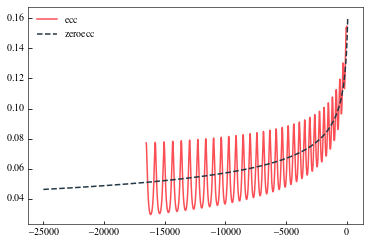

In [12]:
plt.plot(dataDictPN["t"], np.abs(dataDictPN["hlm"][(2, 2)]), label="ecc")
plt.plot(dataDictPN["t_zeroecc"], np.abs(dataDictPN["hlm_zeroecc"][(2, 2)]), label="zeroecc", ls="--")
plt.legend()

Text(0, 0.5, 'Re[$h_{22}(t)$]')

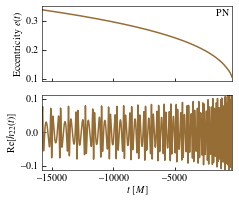

In [13]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 3), sharex=True)
tref_in = dataDictPN["t"]
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                    dataDict=dataDictPN,
                                                    method="ResidualAmplitude",
                                                    return_ecc_method=True,
                                                    # extra_kwargs={"treat_mid_points_between_peaks_as_troughs": True}
                                                    )
eccMethod.plot_measured_ecc(fig, ax[0])
ax[0].set_xlabel("")
ax[0].grid(False)
ax[0].text(0.98, 0.98, "PN", ha="right", va="top", transform=ax[0].transAxes)


ax[1].plot(tref_in, np.real(dataDictPN["hlm"][(2, 2)]), c=colorsDict["default"])
ax[1].set_ylim(-0.11, 0.11)
ax[1].set_xlim(tref[0], tref[-1])
ax[1].set_xlabel(r"$t$ [$M$]")
ax[1].set_ylabel(r"Re[$h_{22}(t)$]")

In [14]:
fig.suptitle(fr"$q={q:.1f}$, $\chi_{{1z}}={0:.1f}$, $\chi_{{2z}}={0:.1f}$")
fig.subplots_adjust(left=0.16, right=0.98, top=0.92, hspace=0.05)
fig.savefig("../figs/demo_PN.pdf")

### NR

In [15]:
import sxs
import h5py
import os
from scipy.interpolate import InterpolatedUnivariateSpline

In [16]:
def get_nr_data(sxs_id, lev=3, is_private=True, sim_path="./"):
    """Get NR waveform."""
    if is_private:
        data_file = (
            f"{sim_path}/{sxs_id}/Lev{lev}/"
            "rhOverM_Asymptotic_GeometricUnits_CoM.h5")
        cwd = os.getcwd()
        if not os.path.exists(data_file):
            os.chdir(f"{sim_path}")
            os.system(
                f"git annex get {sim_path}/{sxs_id}/Lev3/"
                "rhOverM_Asymptotic_GeometricUnits_CoM.h5")
            os.chdir(cwd)
        waveform_data = h5py.File(data_file, "r")
        waveform = waveform_data["Extrapolated_N2.dir"]
        wf22 = waveform["Y_l2_m2.dat"]
        time_nr = wf22[:, 0]
        h22_nr = wf22[:, 1] + 1j * wf22[:, 2]
    else:
        waveform = sxs.load(f"SXS:BBH:{sxs_id}/Lev/rhOverM",
                            extrapolation_order=2)
        time_nr = waveform.time
        h22_nr = waveform.data[:, waveform.index(2, 2)]
    amp_nr = np.abs(h22_nr)
    phase_nr = np.unwrap(np.angle(h22_nr))
    amp_interp = InterpolatedUnivariateSpline(time_nr, amp_nr)
    phase_interp = InterpolatedUnivariateSpline(time_nr, phase_nr)
    time_interped = np.linspace(time_nr[0], time_nr[-1], 10 * len(time_nr))
    h22_interped = (amp_interp(time_interped)
                    * np.exp(1j * phase_interp(time_interped)))
    return time_interped, h22_interped

In [17]:
sxs_id = "040"
t, h22 = get_nr_data(
    sxs_id,
    sim_path="/home1/md.shaikh/SimAnnex/Private/Ecc1dSur_rerun/")
t = t - get_peak_via_quadratic_fit(t, np.abs(h22))[0]
tstart = -8000
dataDict = {"t": t[t >= tstart],
            "hlm": {(2, 2): h22[t >= tstart]}}
print(dataDict)

{'t': array([-7999.97923848, -7999.94439113, -7999.90954379, ...,
         201.20313764,   201.23798498,   201.27283232]), 'hlm': {(2, 2): array([3.06054694e-02-4.96876990e-02j, 3.05770699e-02-4.97093399e-02j,
       3.05486518e-02-4.97309685e-02j, ...,
       5.93411719e-07-3.94121566e-06j, 5.92707665e-07-3.94144460e-06j,
       5.92001043e-07-3.94166088e-06j])}}


#### Add zero Ecc waveform 

In [18]:
lal_kwargs = {"approximant": "IMRPhenomT",
              "q": 1,
              "chi1": [0.0, 0.0, 0.0],
              "chi2": [0.0, 0.0, 0.0],
              "Momega0": Momega0,
              "ecc": 1e-5,
              "mean_ano": 0}
dataDictphenomT = load_waveform(**lal_kwargs)

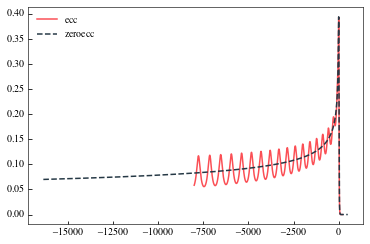

In [19]:
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="ecc")
plt.plot(dataDictphenomT["t"], np.abs(dataDictphenomT["hlm"][(2, 2)]), label="zeroecc", ls="--")
plt.legend()

In [20]:
dataDict.update({"t_zeroecc": dataDictphenomT["t"],
                "hlm_zeroecc": dataDictphenomT["hlm"]})

In [21]:
tref_in = np.arange(-8000.0, 0.0, 0.1)
tref, ecc, mean_ano, eccMethod = measure_eccentricity(
    tref_in=tref_in,
    dataDict=dataDict,
    method="ResidualAmplitude",
    return_ecc_method=True,
extra_kwargs={"num_orbits_to_exclude_before_merger": 2})

Text(0, 0.5, 'Re[$h_{22}(t)$]')

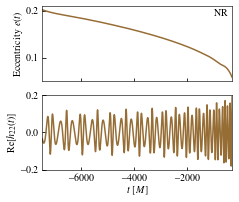

In [22]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 3), sharex=True)

eccMethod.plot_measured_ecc(fig, ax[0])
ax[0].set_xlabel("")
ax[0].grid(False)
ax[0].text(0.98, 0.98, "NR", ha="right", va="top", transform=ax[0].transAxes)

ax[1].plot(dataDict["t"], np.real(dataDict["hlm"][(2, 2)]), c=colorsDict["default"])
ax[1].set_ylim(-0.2, 0.2)
ax[1].set_xlim(tref[0], tref[-1])
ax[1].set_xlabel(r"$t$ [$M$]")
ax[1].set_ylabel(r"Re[$h_{22}(t)$]")

In [23]:
fig.suptitle(fr"$q={1:.1f}$, $\chi_{{1z}}={0:.1f}$, $\chi_{{2z}}={0:.1f}$")
fig.subplots_adjust(left=0.16, right=0.98, top=0.92, hspace=0.05)
fig.savefig("../figs/demo_NR.pdf")

### EMRI

In [37]:
f = h5py.File("../../data/ecc_waveforms/Non-Precessing/EMRI_M1000000.0_mu10.0_p012.0_e00.3_T0.00100_dt10.00000_dist1.0_theta1.0471975511965976_phi0.7853981633974483.h5")

In [38]:
dataDictEMRI = {"t": f["t"][:],
               "hlm": {(2, 2): f["h22"][:]}}

In [39]:
dataDictEMRI

{'t': array([0.000e+00, 1.000e+01, 2.000e+01, ..., 3.153e+04, 3.154e+04,
        3.155e+04]),
 'hlm': {(2,
   2): array([ 3.18297776e-23+1.12850284e-22j,  4.75583375e-23+1.07260025e-22j,
          6.24878230e-23+9.93807738e-23j, ...,
         -1.53490868e-23+4.88782853e-23j, -1.25630882e-23+4.96985453e-23j,
         -9.71875343e-24+5.03767277e-23j])}}

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:421: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


Text(0, 0.5, 'Re[$h_{22}(t)$]')

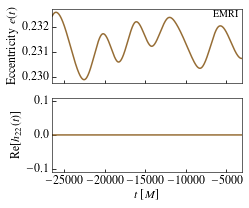

In [40]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 3), sharex=True)
tref_in = dataDictEMRI["t"] - get_peak_via_quadratic_fit(dataDictEMRI["t"], np.abs(dataDictEMRI["hlm"][(2, 2)]))[0]
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                    dataDict=dataDictEMRI,
                                                    method="Amplitude",
                                                    return_ecc_method=True,
                                                    # extra_kwargs={"treat_mid_points_between_peaks_as_troughs": True}
                                                    )
eccMethod.plot_measured_ecc(fig, ax[0])
ax[0].set_xlabel("")
ax[0].grid(False)
ax[0].text(0.98, 0.98, "EMRI", ha="right", va="top", transform=ax[0].transAxes)


ax[1].plot(tref_in, np.real(dataDictEMRI["hlm"][(2, 2)]), c=colorsDict["default"])
ax[1].set_ylim(-0.11, 0.11)
ax[1].set_xlim(tref[0], tref[-1])
ax[1].set_xlabel(r"$t$ [$M$]")
ax[1].set_ylabel(r"Re[$h_{22}(t)$]")

(<Figure size 864x1440 with 5 Axes>,
 array([<AxesSubplot:xlabel='$t$', ylabel='Eccentricity $e(t)$'>,
        <AxesSubplot:xlabel='$t$', ylabel='$de/dt$'>,
        <AxesSubplot:xlabel='$t$', ylabel='mean anomaly'>,
        <AxesSubplot:xlabel='$t$', ylabel='$\\omega_{22}(t)$'>,
        <AxesSubplot:xlabel='$t$', ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>],
       dtype=object))

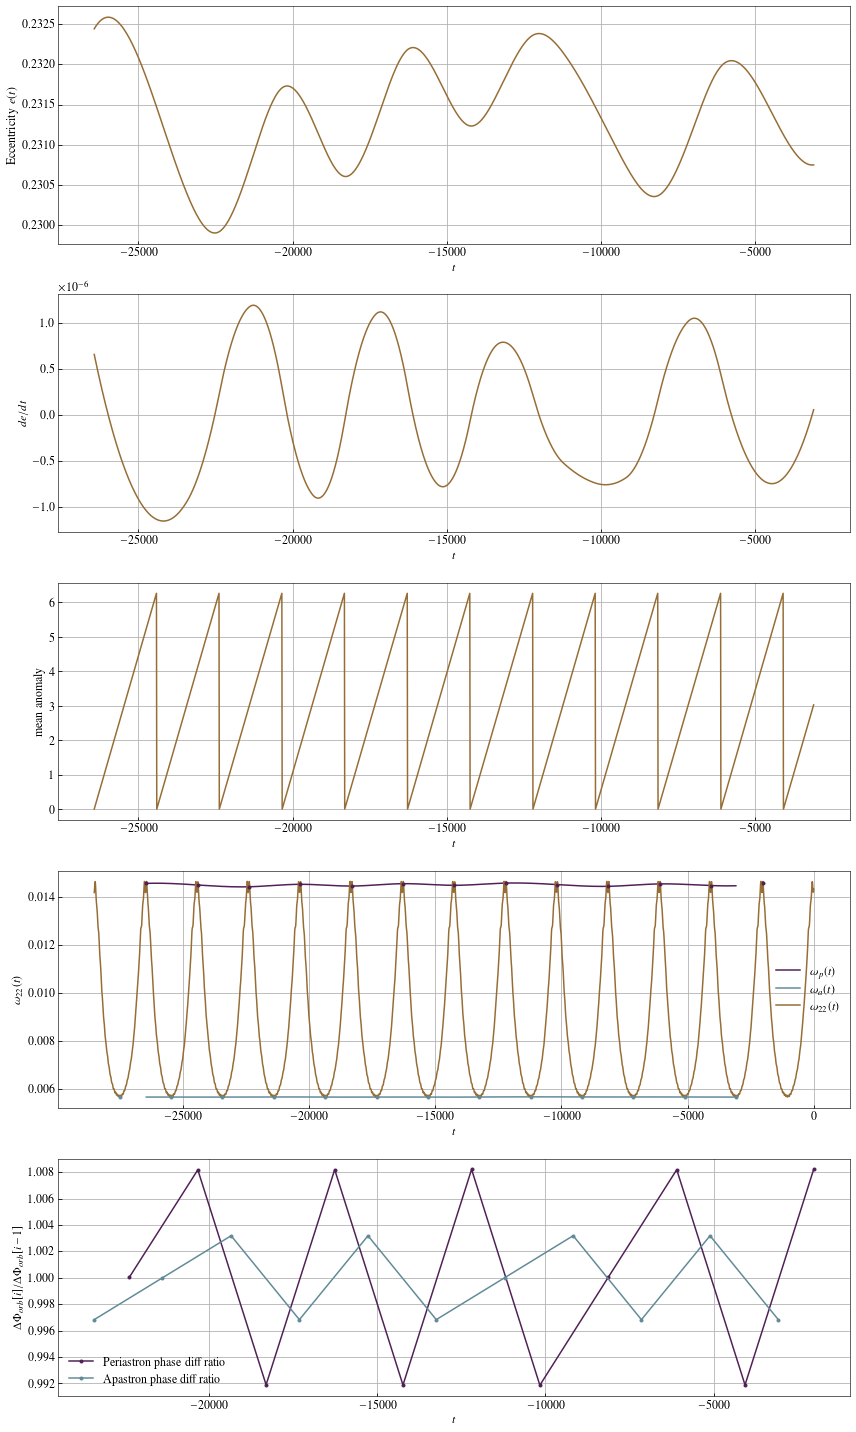

In [41]:
eccMethod.make_diagnostic_plots()

In [42]:
f.close()

In [43]:
eccMethod.extra_kwargs

{'num_orbits_to_exclude_before_merger': 1,
 'extrema_finding_kwargs': {'height': None,
  'threshold': None,
  'distance': None,
  'prominence': None,
  'width': 5,
  'wlen': None,
  'rel_height': 0.5,
  'plateau_size': None},
 'debug': True,
 'omega22_averaging_method': 'average_between_extrema'}

(-25000.0, -22000.0)

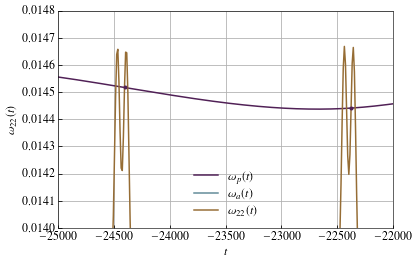

In [50]:
fig, ax = eccMethod.plot_extrema_in_omega22()
ax.set_ylim(0.014, 0.0148)
ax.set_xlim(-25000, -22000)

In [51]:
fig.tight_layout()
fig.savefig("../../../public_html/EccDefinition/debug_EMRI.pdf")